# Pergunta 19

### Qual a relação do número de concluintes de cursos de graduação presencial x à distância, por região?

In [17]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [8]:
curso_column = ["QT_CONCLUINTE_TOTAL", "CO_IES", "TP_MODALIDADE_ENSINO"]
curso = pd.read_csv(r"C:\Users\arthu\Desktop\TpDados\Curso.csv", index_col=False, header=0, usecols=curso_column)


In [9]:
ies_column = ["CO_IES", "CO_REGIAO"]
ies = pd.read_csv(r"C:\Users\arthu\Desktop\TpDados\Ies.csv", index_col=False, header=0, usecols=ies_column)

In [10]:
ies["CO_REGIAO"] = ies.CO_REGIAO.replace([1,2,3,4,5], ["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"])

In [11]:
curso = curso.merge(ies, on="CO_IES", how='left')

In [12]:
curso_pres = curso[curso["TP_MODALIDADE_ENSINO"] == 1]

curso_dist = curso[curso["TP_MODALIDADE_ENSINO"] == 2]

{'Sudeste': 15583, 'Nordeste': 7593, 'Sul': 6655, 'Centro-Oeste': 3346, 'Norte': 2721}


Text(0.5, 1.0, 'Presencial')

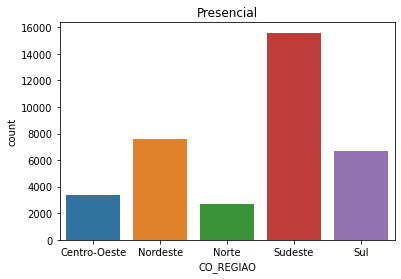

In [18]:
print(curso_pres["CO_REGIAO"].value_counts().to_dict())

seaborn.countplot(x='CO_REGIAO', data=curso_pres)
plt.title("Presencial")

{'Sudeste': 2024, 'Sul': 1426, 'Nordeste': 618, 'Centro-Oeste': 318, 'Norte': 143}


Text(0.5, 1.0, 'À distância')

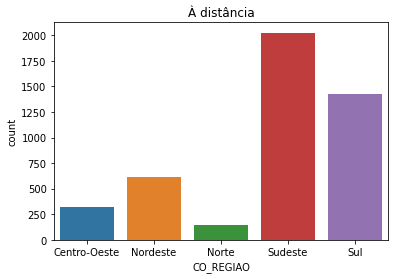

In [19]:
print(curso_dist["CO_REGIAO"].value_counts().to_dict())

seaborn.countplot(x='CO_REGIAO', data=curso_dist)
plt.title("À distância")